<a href="https://colab.research.google.com/github/sangeetharajagopal/AI-ML/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 8.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
langchain 0.3.18 requires n

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
import os
print(os.listdir())
df = pd.read_csv('./foodhub_order.csv')

['.config', 'foodhub_order.csv', 'drive', 'sample_data']


In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
we have 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
we have 4 numerical data, 4 object and 1 column in float. However the rating column should be of type float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There is no missing values in any of the columns


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code
df.describe()
# To check the min, avg, max for particular column on food preparation time
df['food_preparation_time'].describe()
print("Minimum preparation time is: ", df['food_preparation_time'].min())
print("Average preparation time is:" , df['food_preparation_time'].mean())
print("Maximium preparation time is:" , df['food_preparation_time'].max())



Minimum preparation time is:  20
Average preparation time is: 27.371970495258168
Maximium preparation time is: 35


#### Observations:
The food_preparation_time taken:
minimum is: 20.00
Average: 27.37
maximium: 35.00



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df.rating.value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
Totally 736 were not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

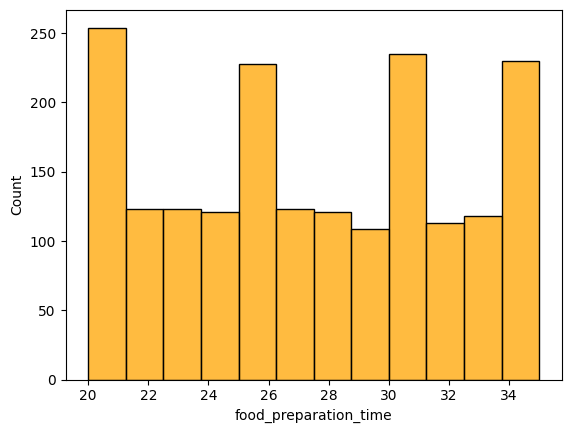

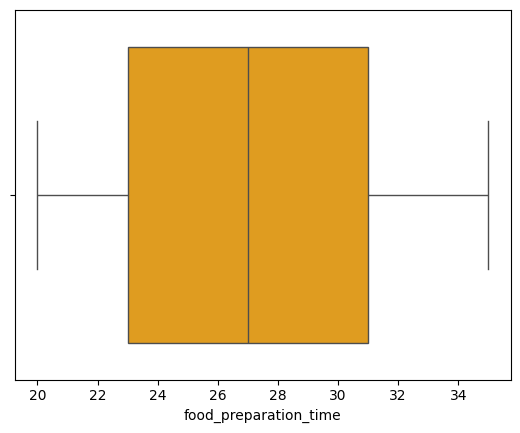

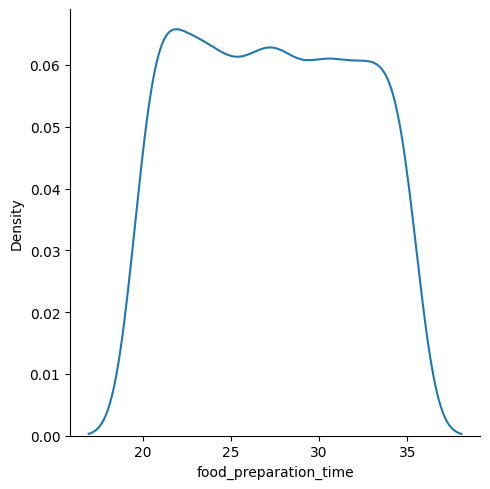

In [ ]:
# Write the code here
sns.histplot(data=df, x='food_preparation_time',color='orange')
plt.show()
sns.boxplot(data=df,x='food_preparation_time',color='orange')
plt.show()
sns.displot(data=df,x='food_preparation_time',kind='kde')
plt.show()


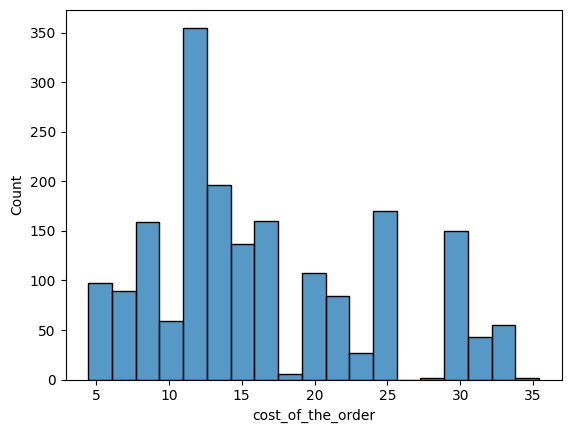

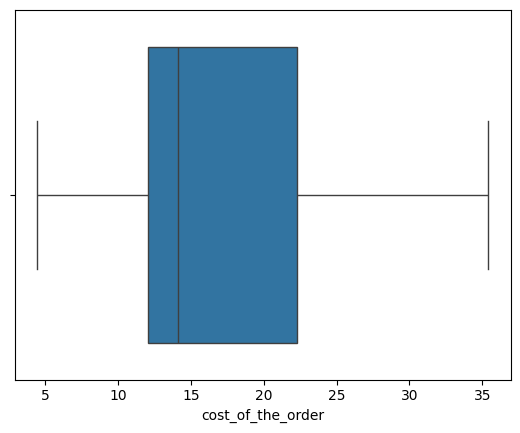

In [ ]:
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()


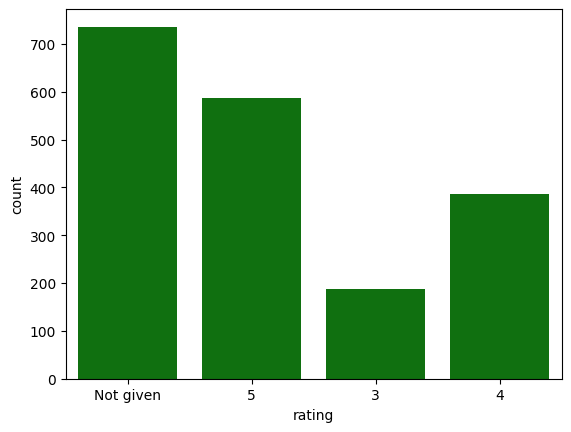

In [ ]:
sns.countplot(data=df,x='rating',color='green')
plt.show()

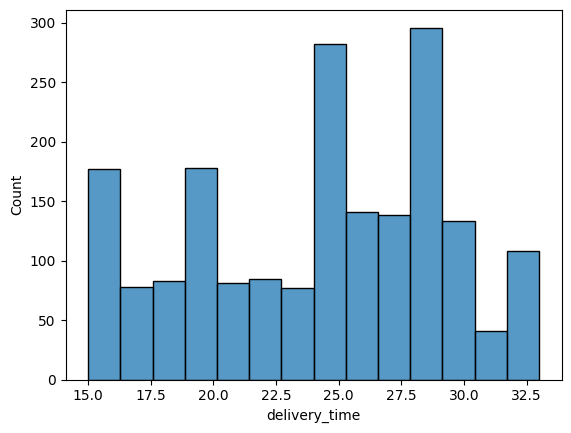

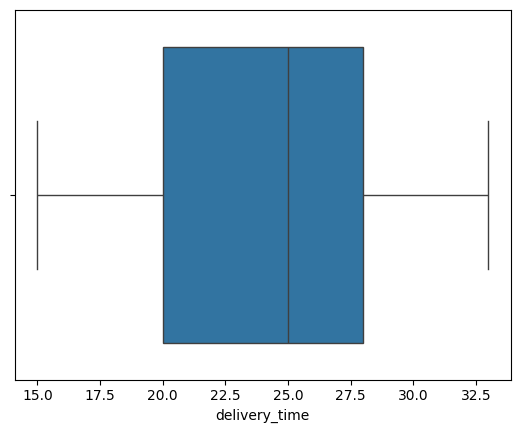

In [ ]:

sns.histplot(data=df, x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()



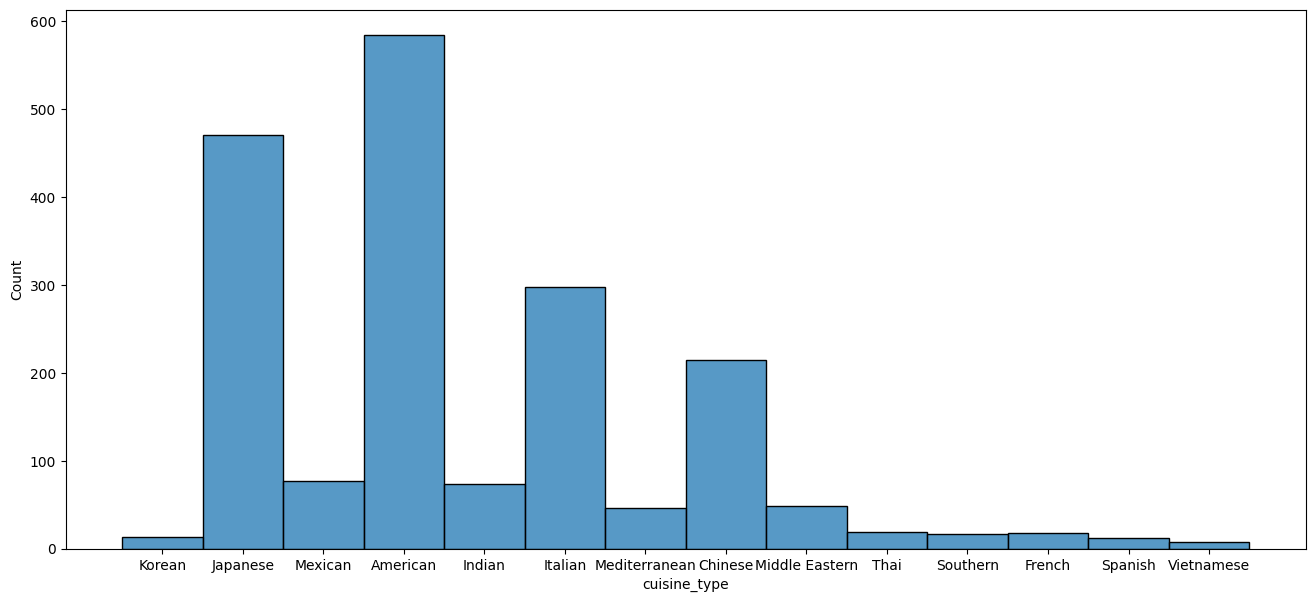

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data = df, x='cuisine_type')
plt.show()

### Observation:
Perfomed the univarate exploration on numerical data

The food prepation time seems to be in the Normal distribution

The cost of the order is right skewed

The rating "not given" is higher than the positive review which is 5 star

And the delivery time seems to be in left skewed


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False).reset_index().head()

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
In terms of orders received the top 5 restaurants are:

Shake shack

The Meatball Shop

Blue Ribbon Sushi

Blue Ribbon Fried Chicken

Parm



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

> Add blockquote



In [ ]:
# Write the code here
weakend_cuisine = df[df['day_of_the_week']== 'Weekend']
popular_cuisine = weakend_cuisine['cuisine_type'].value_counts().head()
print(popular_cuisine)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64


#### Observations:

The most popular cusine on weekends are:

American

Japanese

Italian


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
total_order = len(df)
print(total_order)
get_above_20 = len(df[df['cost_of_the_order'] > 20])
print(get_above_20)
get_percentage = (get_above_20/total_order)*100
print(get_percentage)

1898
555
29.24130663856691


#### Observations:

29.24 percentage of orders cost more than 20 dollors

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

df.delivery_time.mean()

24.161749209694417

#### Observations:

Mean of delivery time is: 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

These are the cusotmer ID of top 3 most frequent customers who are eligible for 20% discount vouchers

52832

47440

83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


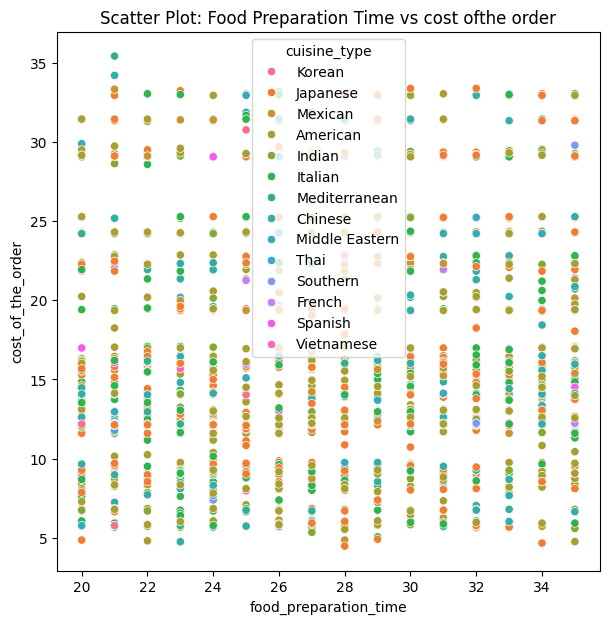

In [ ]:
# Write the code here
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='food_preparation_time', y= 'cost_of_the_order',hue='cuisine_type')
plt.title("Scatter Plot: Food Preparation Time vs cost ofthe order")
plt.show()

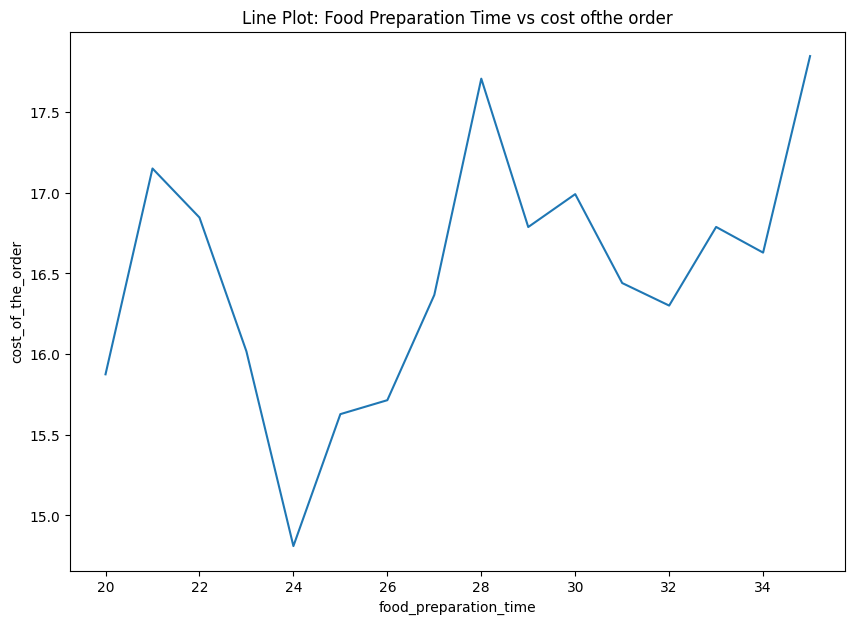

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='food_preparation_time', y= 'cost_of_the_order',errorbar=None)
plt.title("Line Plot: Food Preparation Time vs cost of the order")
plt.show()

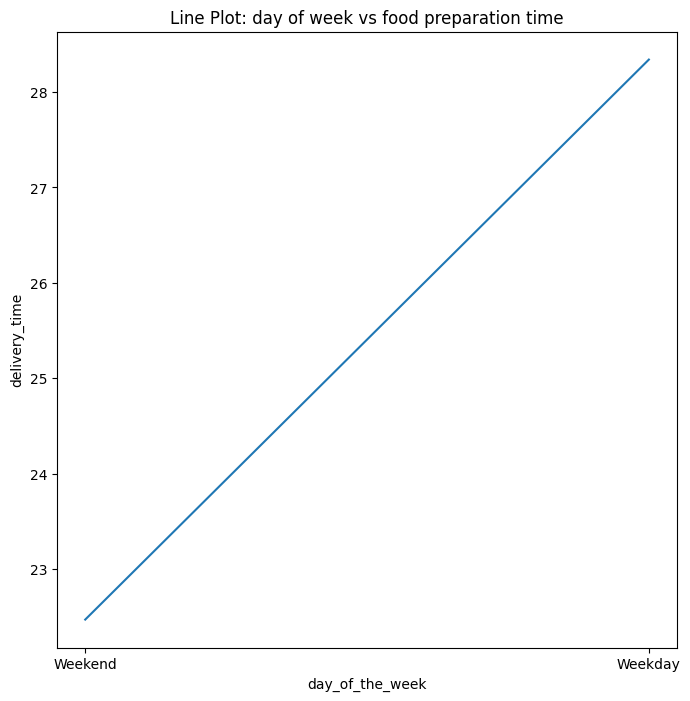

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df, x='day_of_the_week', y= 'delivery_time',errorbar=None)
plt.title("Line Plot: day of week vs food preparation time")
plt.show()

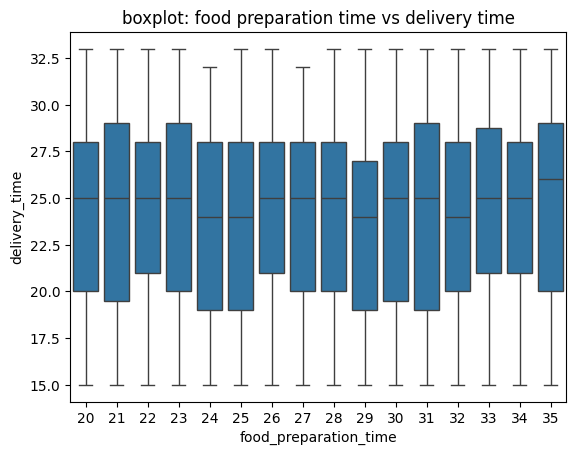

In [ ]:
sns.boxplot(data=df, x='food_preparation_time',y='delivery_time')
plt.title("boxplot: food preparation time vs delivery time")
plt.show()

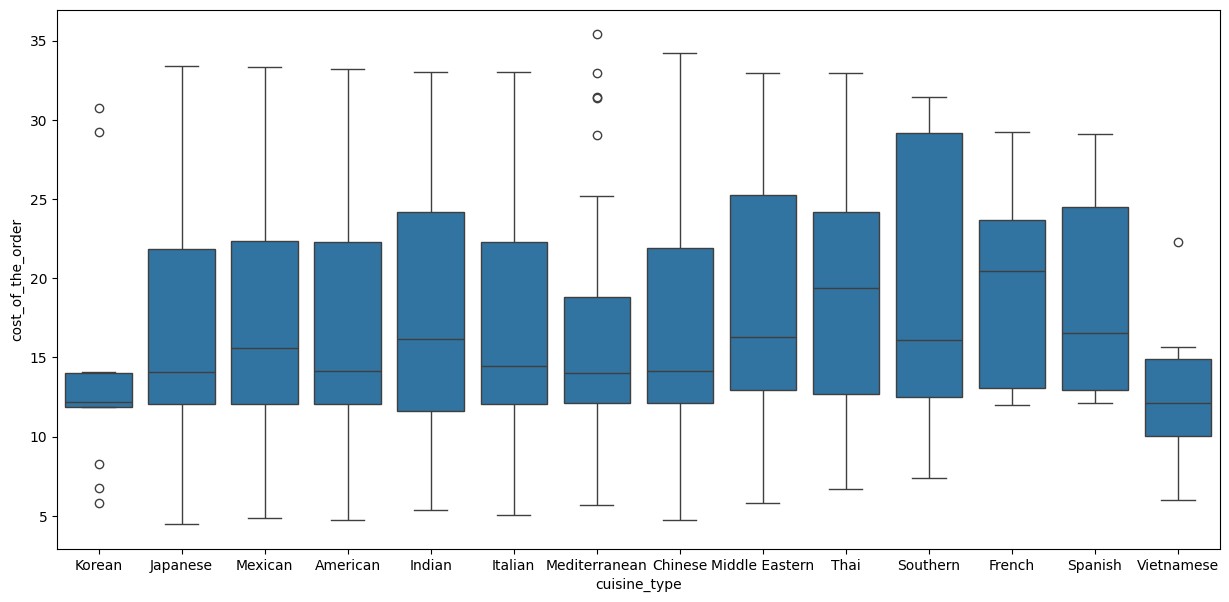

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x='cuisine_type',y='cost_of_the_order')
plt.show()


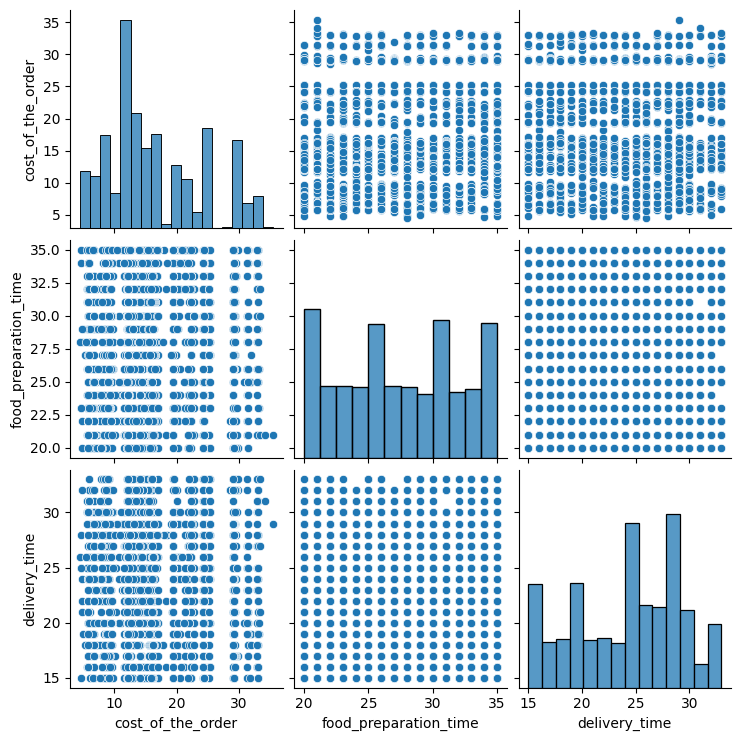

In [ ]:
sns.pairplot(df[['cost_of_the_order','food_preparation_time','delivery_time']])
plt.show()

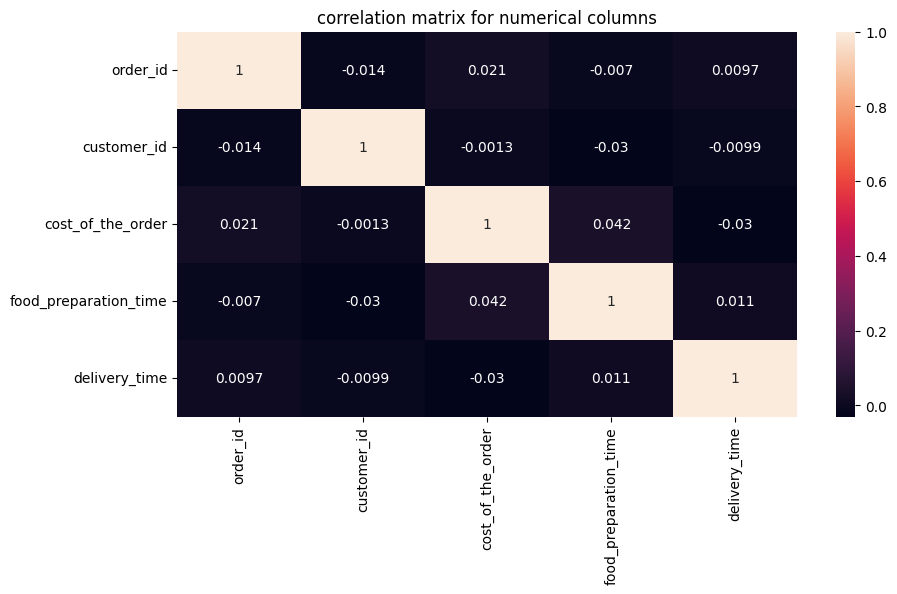

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot= True)
plt.title("correlation matrix for numerical columns")
plt.show()

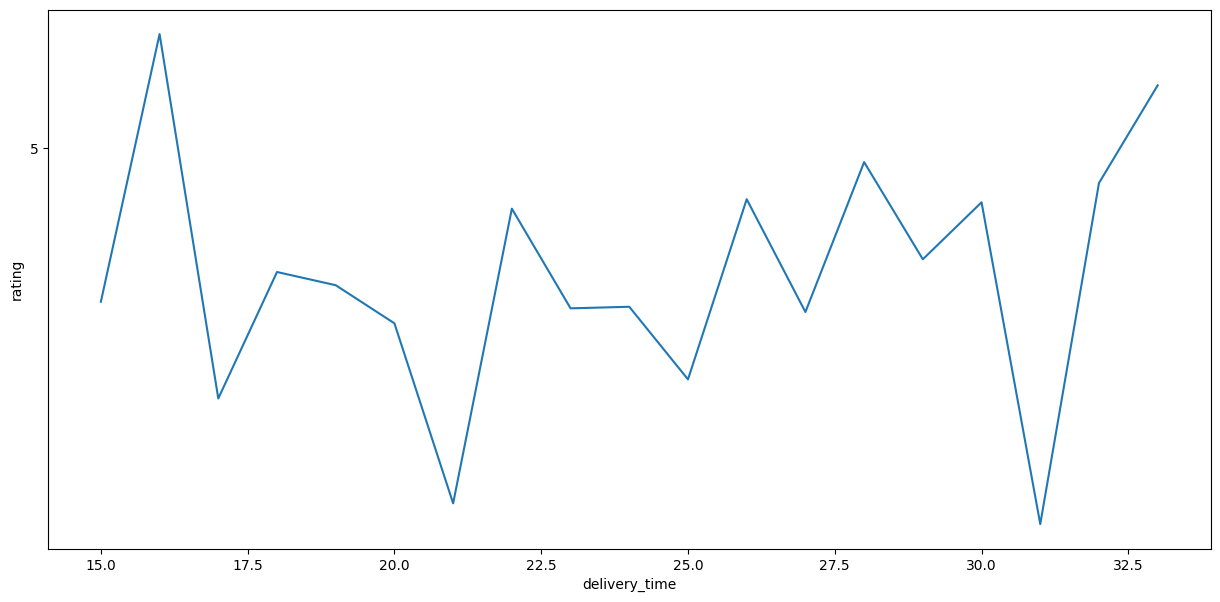

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='delivery_time',y='rating', errorbar=None)
plt.show()

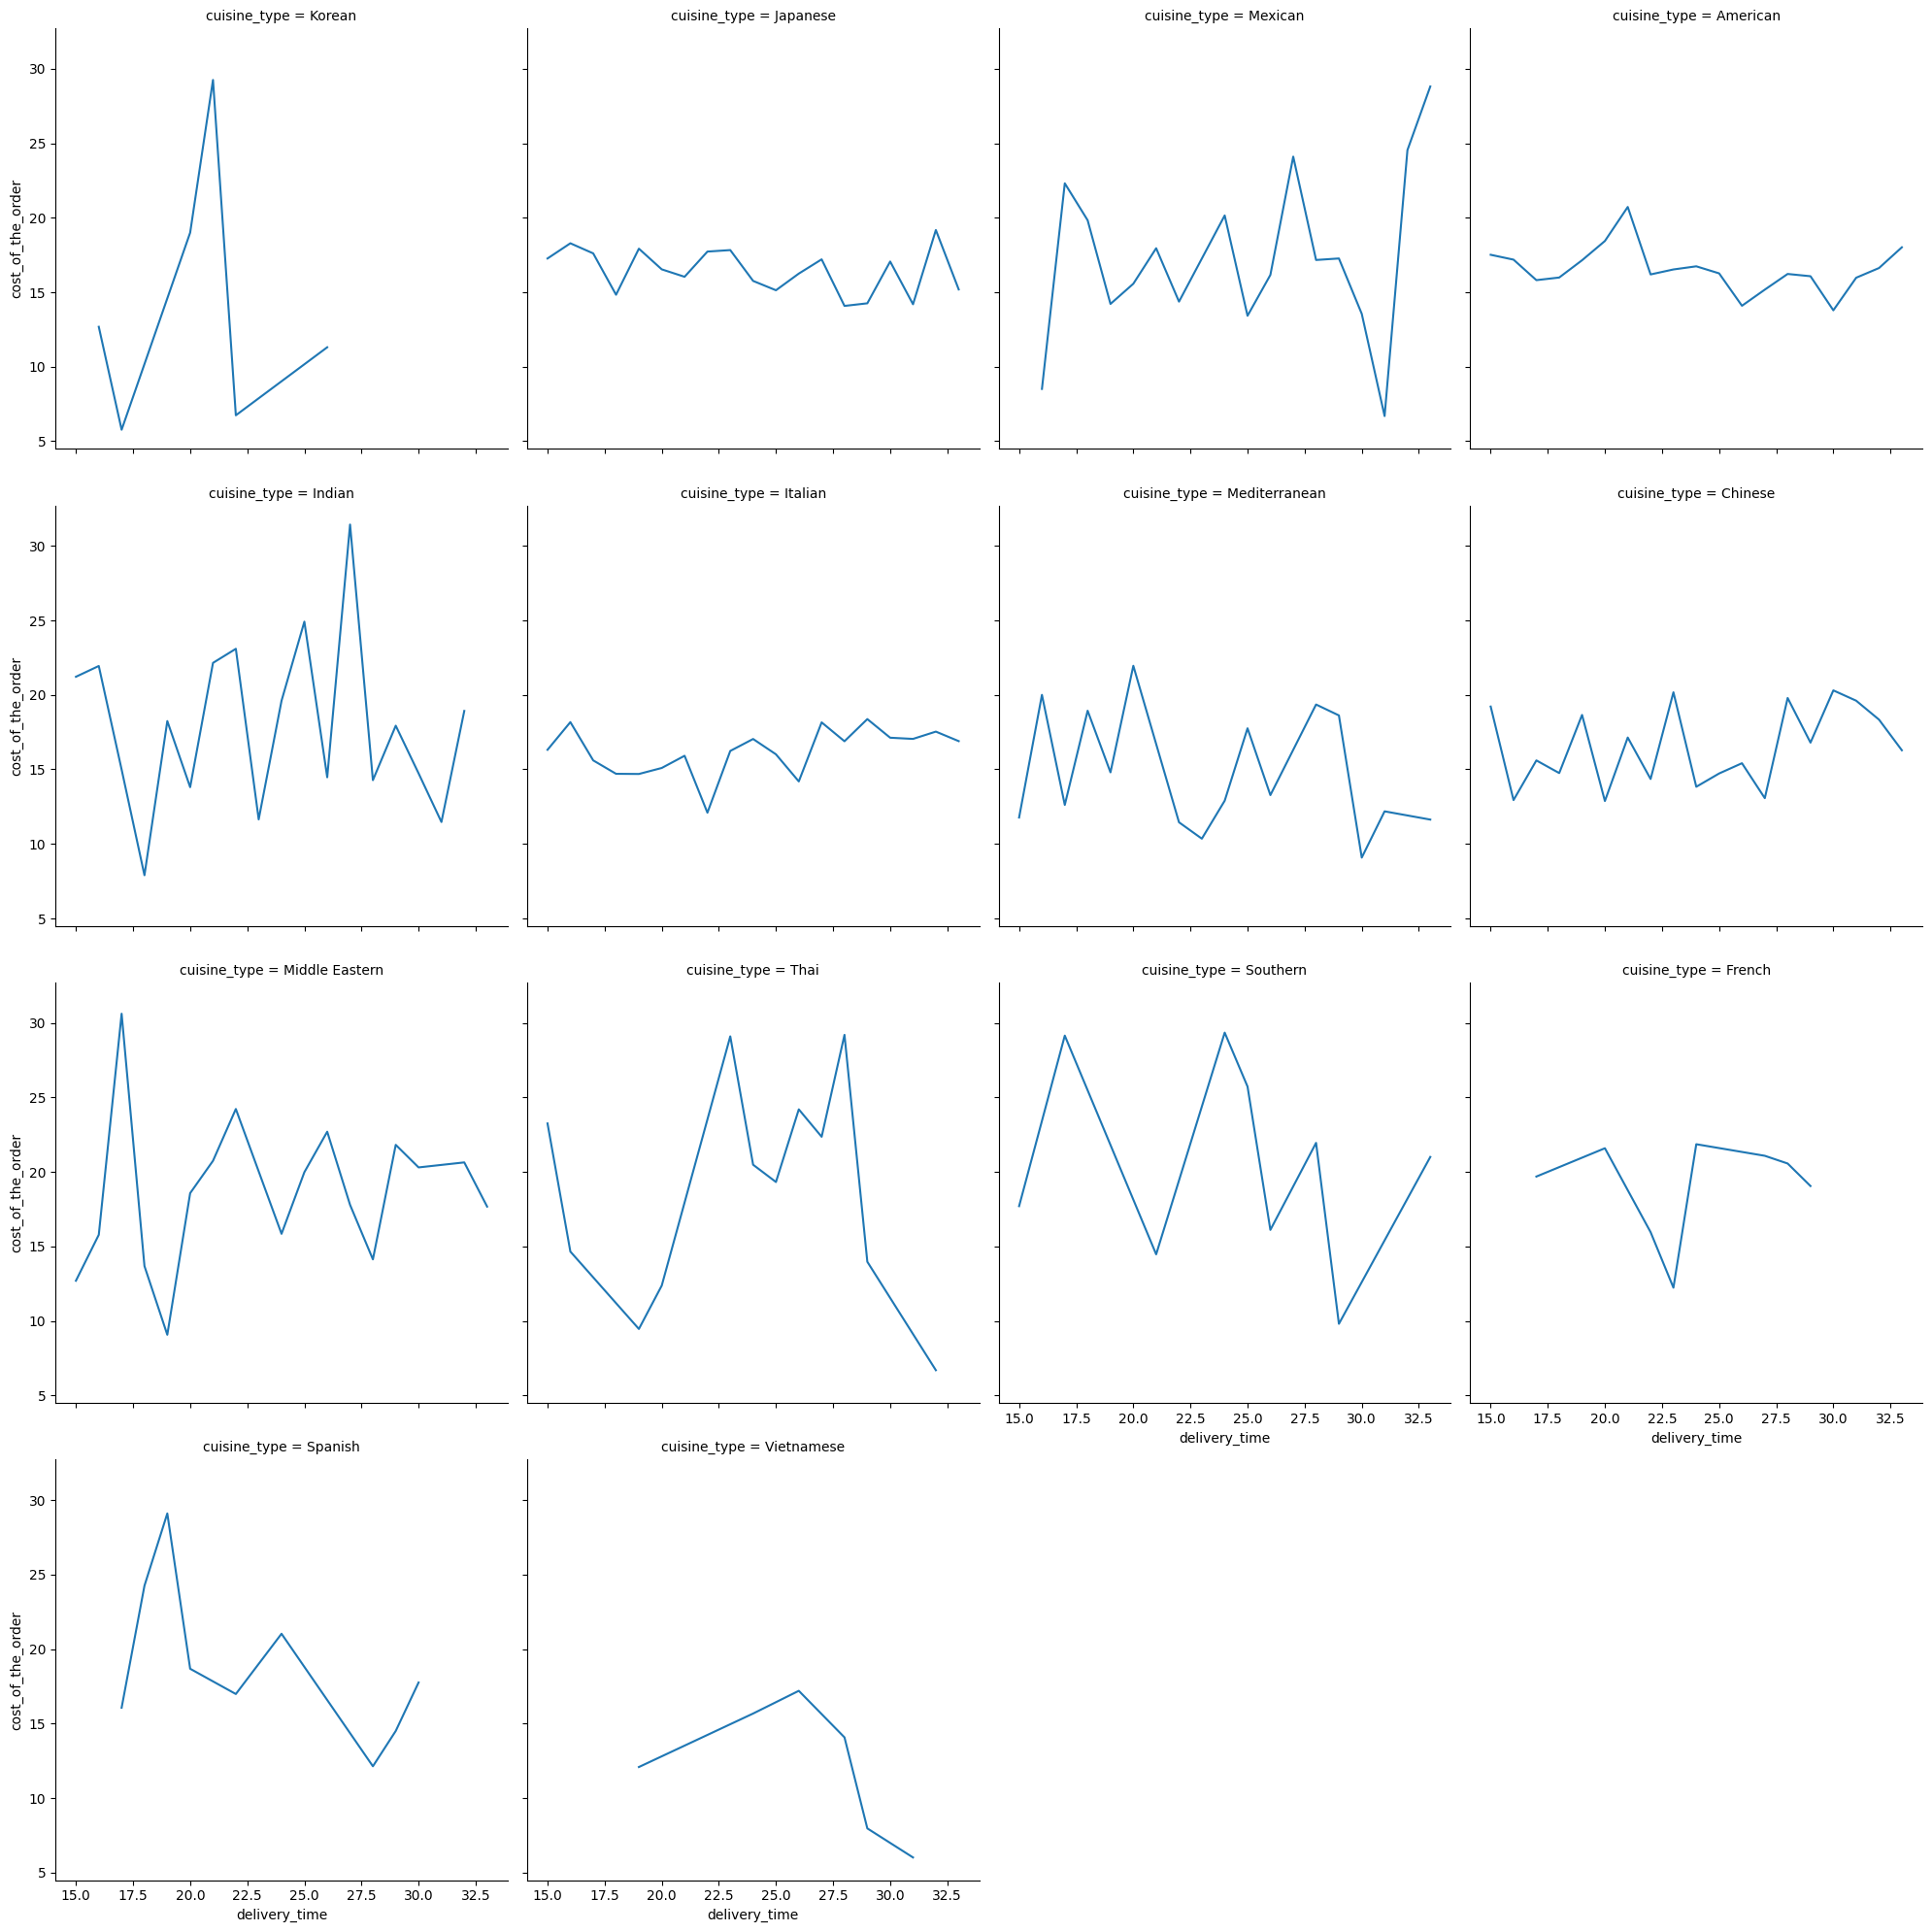

In [ ]:
sns.relplot(data=df,x='delivery_time',y='cost_of_the_order',col='cuisine_type',kind='line', errorbar=None, col_wrap=4)
plt.show()

#Observations:

Performed multivariate analysis for the numberical datas, categorical and could see outliers in few of the cuisine types

Could see the trend in lower the cost of the order lower is the preparation time

Delivery time on weekend is more promising when analysed with delivery time and day of the week column

No negative corelation when analysing numerical columns

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
df.rating.value_counts()
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
get_rating=df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
count_rating= (get_rating[(get_rating['count'] > 50) & (get_rating['mean'] > 4)])
print(count_rating)




               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:
The restaurtans that are eligible for promotional offers includes:

Blue Ribbon Fried Chicken with 64 ratings and 4.32 average

Blue Ribbon Sushi with 73 ratings and 4.21 average

Shake Shack with 133 ratings and 4.27 average

The Meatball Shop with 84 ratings and 4.511 average



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def charges(cost):
  if cost > 5 and cost < 20:
   return cost * 0.25
  elif cost < 5:
   return cost * 0.15
  else:
   return 0

df['revenue'] = df['cost_of_the_order'].apply(charges)
get_total_revenue = df['revenue'].sum()
print("$",get_total_revenue)



$ 4135.7035


#### Observations:

The net revenue generated by the company accorss all orders 4135.70$


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time'] = df.food_preparation_time + df.delivery_time
print(df['total_time'])
order_60_min= (df['total_time']> 60).sum()
print(order_60_min)
get_total = len('order_60_min')/ len(df) * 100
print("the % of time took to prepare and deliver:",get_total)



0       45
1       48
2       51
3       40
4       49
        ..
1893    48
1894    50
1895    55
1896    54
1897    52
Name: total_time, Length: 1898, dtype: int64
200
the % of time took to prepare and deliver: 0.6322444678609063


#### Observations:

0.632% of orders took more than 60 mins to get prepared and delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df['day_of_the_week']= df['day_of_the_week'].astype('string')
print((df.day_of_the_week).dtype)
mean_del_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_del_time)


string
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:

Delivery time average on weekday is: 28.34

Delivery time average on weekend is: 22.47

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Cusinie type: By analyzing the frequency of the order for each cuisine type, its obivious that the cuisine (American and followed by Japanese ) are the two most prefered cuisine  

* Ratings: on observing the ratings in general 5 star ratings is more when compared to negative reviews

* Delivery time: Delivery time during weekends are promising than the weekdays

### Recommendations:

*  Cusinie type: There are few cuisine types ( spanish, korean, thai) are less popular, adversing more about these cuisines, increasing offers for orders, combo in the menu can enhance their sales

*  Ratings: Though there were good ratings in general the " Not given" reviews are more, requesting for review through email, messages can make the restaurtans improve quality of dish or the delivery time.

* Delivery time: weekdays delivery time is higher which might be due to road trafic or higher orders either way increasing staffing would be great.

---

In [ ]:
!jupyter nbconvert --to html PYF_Project_LearnerNotebook_FullCode\ \(2\).ipynb

[NbConvertApp] Converting notebook PYF_Project_LearnerNotebook_FullCode (2).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 1587579 bytes to PYF_Project_LearnerNotebook_FullCode (2).html
